In [18]:
import tensorflow as tf
import random
import json
import numpy as np
import pandas as pd 
import os
import tempfile
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing import image
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [19]:
train_dir =r"C:\Users\josep\tensorflow_class\test" #passing the path with training images
test_dir =r"C:\Users\josep\tensorflow_class\train"   #passing the path with testing images

In [20]:
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [21]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 5746 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [22]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)      

In [23]:
model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/60
90/90 [==============================] - ETA: 0s - loss: 9.7796 - accuracy: 0.1706
Epoch 1: val_accuracy improved from -inf to 0.13917, saving model to best_model.h5
90/90 [==============================] - 150s 2s/step - loss: 9.7796 - accuracy: 0.1706 - val_loss: 9.0798 - val_accuracy: 0.1392
Epoch 2/60
90/90 [==============================] - ETA: 0s - loss: 9.4155 - accuracy: 0.1841
Epoch 2: val_accuracy improved from 0.13917 to 0.21181, saving model to best_model.h5
90/90 [==============================] - 563s 6s/step - loss: 9.4155 - accuracy: 0.1841 - val_loss: 8.7848 - val_accuracy: 0.2118
Epoch 3/60
90/90 [==============================] - ETA: 0s - loss: 9.1445 - accuracy: 0.1986
Epoch 3: val_accuracy did not improve from 0.21181
90/90 [==============================] - 68s 753ms/step - loss: 9.1445 - accuracy: 0.1986 - val_loss: 8.9361 - val_accuracy: 0.1970
Epoch 4/60
90/90 [==============================] - ETA: 0s - loss: 8.8858 - accuracy: 0.2146
Epoch 4: val

Epoch 29/60
90/90 [==============================] - ETA: 0s - loss: 3.7413 - accuracy: 0.3911
Epoch 29: val_accuracy did not improve from 0.41752
90/90 [==============================] - 57s 629ms/step - loss: 3.7413 - accuracy: 0.3911 - val_loss: 3.7035 - val_accuracy: 0.3933
Epoch 30/60
90/90 [==============================] - ETA: 0s - loss: 3.6387 - accuracy: 0.3944
Epoch 30: val_accuracy did not improve from 0.41752
90/90 [==============================] - 55s 617ms/step - loss: 3.6387 - accuracy: 0.3944 - val_loss: 3.6290 - val_accuracy: 0.4060
Epoch 31/60
90/90 [==============================] - ETA: 0s - loss: 3.5120 - accuracy: 0.4039
Epoch 31: val_accuracy did not improve from 0.41752
90/90 [==============================] - 54s 603ms/step - loss: 3.5120 - accuracy: 0.4039 - val_loss: 3.5827 - val_accuracy: 0.4062
Epoch 32/60
90/90 [==============================] - ETA: 0s - loss: 3.3884 - accuracy: 0.4163
Epoch 32: val_accuracy improved from 0.41752 to 0.42223, saving mode

Epoch 57/60
90/90 [==============================] - ETA: 0s - loss: 1.9203 - accuracy: 0.5435
Epoch 57: val_accuracy improved from 0.53040 to 0.53893, saving model to best_model.h5
90/90 [==============================] - 57s 633ms/step - loss: 1.9203 - accuracy: 0.5435 - val_loss: 1.9876 - val_accuracy: 0.5389
Epoch 58/60
90/90 [==============================] - ETA: 0s - loss: 1.9053 - accuracy: 0.5503
Epoch 58: val_accuracy did not improve from 0.53893
90/90 [==============================] - 58s 640ms/step - loss: 1.9053 - accuracy: 0.5503 - val_loss: 2.0089 - val_accuracy: 0.5187
Epoch 59/60
90/90 [==============================] - ETA: 0s - loss: 1.8927 - accuracy: 0.5466
Epoch 59: val_accuracy improved from 0.53893 to 0.55130, saving model to best_model.h5
90/90 [==============================] - 58s 645ms/step - loss: 1.8927 - accuracy: 0.5466 - val_loss: 1.9286 - val_accuracy: 0.5513
Epoch 60/60
90/90 [==============================] - ETA: 0s - loss: 1.8453 - accuracy: 0.558

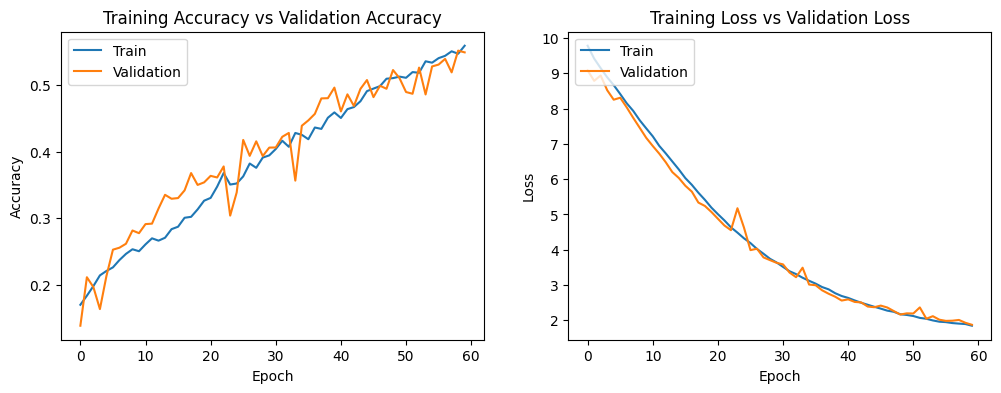

In [24]:
epochs = 60
batch_size = 64
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator,callbacks=[es, mc])
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [25]:
model = load_model('best_model.h5')

In [27]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

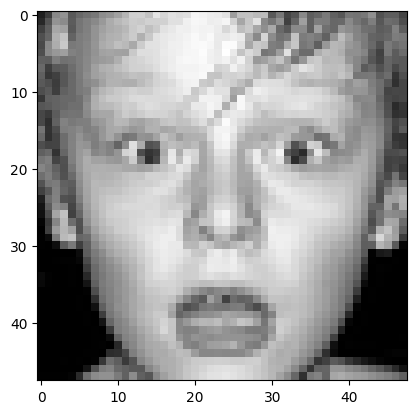

In [54]:
img = load_img(r"C:\Users\josep\tensorflow_class\train\surprised\im34.png", target_size = (48,48), color_mode = "grayscale")
img = img_to_array(img)
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [55]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

1/1 [==============================] - 0s 19ms/step
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
Surprise


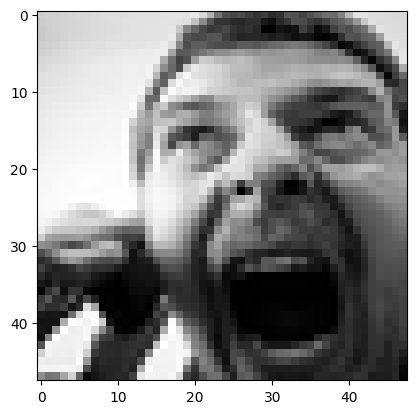

In [52]:
img = load_img(r"C:\Users\josep\tensorflow_class\train\angry\im8.png", target_size = (48,48), color_mode = "grayscale")
img = img_to_array(img)
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [53]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

1/1 [==============================] - 0s 20ms/step
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Angry
